In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
import keras
keras.__version__

from keras import Sequential
from keras.layers import Dense, Activation

import pandas as pd
pd.__version__
pd.options.display.max_rows=15

import numpy as np
np.__version__

Using TensorFlow backend.


'1.18.4'

In [0]:
import pandas as pd
white_wine = pd.read_csv('/gdrive/My Drive/winequality-white.csv', header = 'infer')
red_wine = pd.read_csv('/gdrive/My Drive/winequality-red.csv', header = 'infer')



In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_data(df, t_r):

  X = df.drop(['quality'], axis = 1)
  Y = df['quality']

  X_train, X_test = train_test_split(X, test_size = 1-t_r, random_state = 0)
  Y_train, Y_test = train_test_split(Y, test_size = 1-t_r, random_state = 0)


  return X_train.values, Y_train, X_test.values, Y_test

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

## <2-7. white_wine의 가중치 초기화>

###1) Hidden Layer  = 6, epoch = 200, batch_size = 128



In [8]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 1s 191us/step - loss: 11.7566 - accuracy: 0.3457 - val_loss: 2.8377 - val_accuracy: 0.4340
Epoch 2/200
3428/3428 [==============================] - 0s 70us/step - loss: 2.2760 - accuracy: 0.3629 - val_loss: 2.4145 - val_accuracy: 0.3000
Epoch 3/200
3428/3428 [==============================] - 0s 68us/step - loss: 1.7354 - accuracy: 0.3836 - val_loss: 1.9225 - val_accuracy: 0.3170
Epoch 4/200
3428/3428 [==============================] - 0s 70us/step - loss: 1.5810 - accuracy: 0.3824 - val_loss: 1.4073 - val_accuracy: 0.4286
Epoch 5/200
3428/3428 [==============================] - 0s 67us/step - loss: 1.3519 - accuracy: 0.4399 - val_loss: 1.5504 - val_accuracy: 0.4279
Epoch 6/200
3428/3428 [==============================] - 0s 73us/step - loss: 1.4142 - accuracy: 0.4107 - val_loss: 1.4276 - val_accuracy: 0.4510
Epoch 7/200
3428/3428 [==============================] - 0s 65us/step - lo

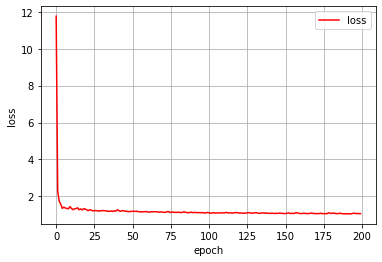

In [9]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

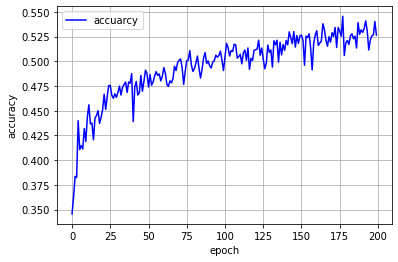

In [10]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.4959183633327484


### 2) 1)의 조건에서 epoch 를 200에서 1000으로 증가.

In [12]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/1000
3428/3428 [==============================] - 0s 114us/step - loss: 12.3000 - accuracy: 0.2981 - val_loss: 3.1570 - val_accuracy: 0.4286
Epoch 2/1000
3428/3428 [==============================] - 0s 66us/step - loss: 2.0758 - accuracy: 0.3868 - val_loss: 1.8798 - val_accuracy: 0.3000
Epoch 3/1000
3428/3428 [==============================] - 0s 71us/step - loss: 1.5781 - accuracy: 0.4358 - val_loss: 1.5365 - val_accuracy: 0.4320
Epoch 4/1000
3428/3428 [==============================] - 0s 65us/step - loss: 1.4288 - accuracy: 0.4513 - val_loss: 1.4778 - val_accuracy: 0.4245
Epoch 5/1000
3428/3428 [==============================] - 0s 69us/step - loss: 1.3850 - accuracy: 0.4478 - val_loss: 1.4641 - val_accuracy: 0.4279
Epoch 6/1000
3428/3428 [==============================] - 0s 67us/step - loss: 1.3467 - accuracy: 0.4498 - val_loss: 1.3689 - val_accuracy: 0.4286
Epoch 7/1000
3428/3428 [==============================] - 0s 66us/st

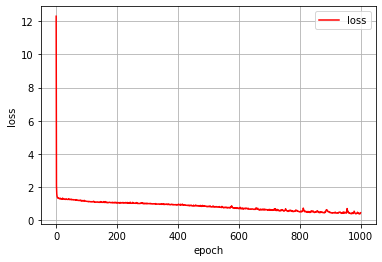

In [13]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

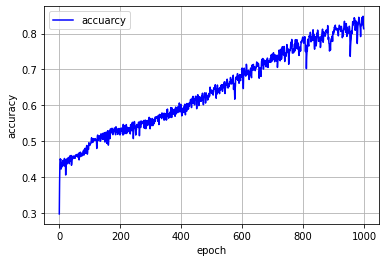

In [14]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.5462585091590881


## <2-8. white wine의 데이터 정규화>

### 1) Hidden Layer = 6, epoch = 1000, batch_size = 128, he_normalization


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/1000
3428/3428 [==============================] - 0s 115us/step - loss: 1.6091 - accuracy: 0.3915 - val_loss: 1.3735 - val_accuracy: 0.4993
Epoch 2/1000
3428/3428 [==============================] - 0s 66us/step - loss: 1.2558 - accuracy: 0.5321 - val_loss: 1.2703 - val_accuracy: 0.5245
Epoch 3/1000
3428/3428 [==============================] - 0s 68us/step - loss: 1.1444 - accuracy: 0.5563 - val_loss: 1.2168 - val_accuracy: 0.5150
Epoch 4/1000
3428/3428 [==============================] - 0s 71us/step - loss: 1.0861 - accuracy: 0.5747 - val_loss: 1.1938 - val_accuracy: 0.5109
Epoch 5/1000
3428/3428 [==============================] - 0s 64us/step - loss: 1.0331 - accuracy: 0.5837 - val_loss: 1.1480 - val_accuracy: 0.5476
Epoch 6/1000
3428/3428 [==============================] - 0s 66us/step - loss: 0.9839 - accuracy: 0.5948 - val_loss: 1.2256 - val_accuracy: 0.5218
Epoch 7/1000
3428/3428 [==============================] - 0s 68us/ste

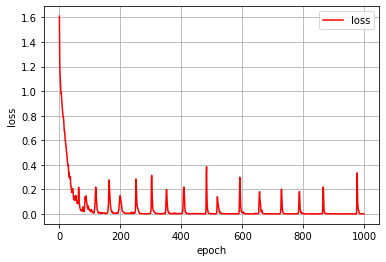

In [18]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

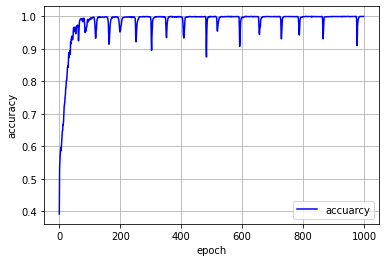

In [19]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.6163265109062195


### 2) Hidden Layer = 6, epoch = 200, batch_size = 128, he_normalization

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 0s 118us/step - loss: 1.8415 - accuracy: 0.3451 - val_loss: 1.5224 - val_accuracy: 0.4932
Epoch 2/200
3428/3428 [==============================] - 0s 66us/step - loss: 1.3314 - accuracy: 0.5283 - val_loss: 1.3078 - val_accuracy: 0.5129
Epoch 3/200
3428/3428 [==============================] - 0s 66us/step - loss: 1.1471 - accuracy: 0.5546 - val_loss: 1.2014 - val_accuracy: 0.5279
Epoch 4/200
3428/3428 [==============================] - 0s 66us/step - loss: 1.0553 - accuracy: 0.5659 - val_loss: 1.2075 - val_accuracy: 0.5313
Epoch 5/200
3428/3428 [==============================] - 0s 70us/step - loss: 1.0167 - accuracy: 0.5723 - val_loss: 1.1492 - val_accuracy: 0.5306
Epoch 6/200
3428/3428 [==============================] - 0s 66us/step - loss: 0.9857 - accuracy: 0.5884 - val_loss: 1.1456 - val_accuracy: 0.5395
Epoch 7/200
3428/3428 [==============================] - 0s 68us/step - los

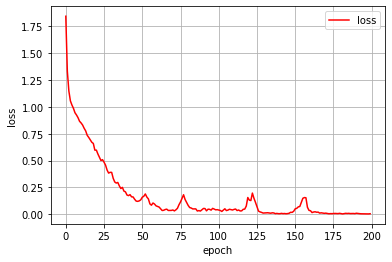

In [23]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

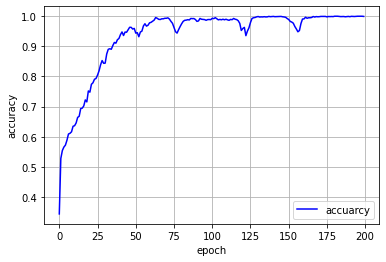

In [24]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.6115646362304688


### 3) 2)의 조건에 Dropout을 적용

In [26]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 1s 183us/step - loss: 1.8778 - accuracy: 0.2418 - val_loss: 1.4043 - val_accuracy: 0.4374
Epoch 2/200
3428/3428 [==============================] - 0s 88us/step - loss: 1.4279 - accuracy: 0.4434 - val_loss: 1.2482 - val_accuracy: 0.5184
Epoch 3/200
3428/3428 [==============================] - 0s 87us/step - loss: 1.2884 - accuracy: 0.4735 - val_loss: 1.1979 - val_accuracy: 0.5224
Epoch 4/200
3428/3428 [==============================] - 0s 87us/step - loss: 1.2501 - accuracy: 0.4898 - val_loss: 1.1835 - val_accuracy: 0.5347
Epoch 5/200
3428/3428 [==============================] - 0s 88us/step - loss: 1.2212 - accuracy: 0.5058 - val_loss: 1.1691 - val_accuracy: 0.5170
Epoch 6/200
3428/3428 [==============================] - 0s 86us/step - loss: 1.1996 - accuracy: 0.4945 - val_loss: 1.1597 - val_accuracy: 0.5272
Epoch 7/200
3428/3428 [==============================] - 0s 82us/step - los

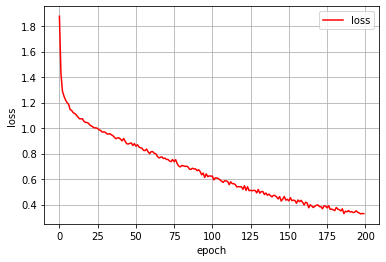

In [27]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

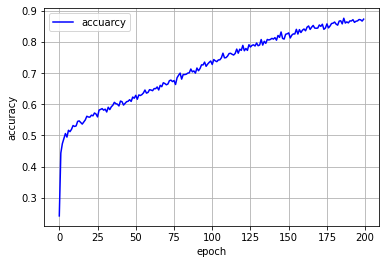

In [28]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.617006778717041


### 4) 3)의 조건에서 epoch = 400으로 수정

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=400, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/400
3428/3428 [==============================] - 1s 179us/step - loss: 1.7185 - accuracy: 0.4291 - val_loss: 1.4597 - val_accuracy: 0.4912
Epoch 2/400
3428/3428 [==============================] - 0s 85us/step - loss: 1.4477 - accuracy: 0.4688 - val_loss: 1.3319 - val_accuracy: 0.4878
Epoch 3/400
3428/3428 [==============================] - 0s 92us/step - loss: 1.3277 - accuracy: 0.4845 - val_loss: 1.2484 - val_accuracy: 0.5068
Epoch 4/400
3428/3428 [==============================] - 0s 86us/step - loss: 1.2638 - accuracy: 0.4831 - val_loss: 1.2150 - val_accuracy: 0.5014
Epoch 5/400
3428/3428 [==============================] - 0s 87us/step - loss: 1.2090 - accuracy: 0.5090 - val_loss: 1.1857 - val_accuracy: 0.5381
Epoch 6/400
3428/3428 [==============================] - 0s 89us/step - loss: 1.1808 - accuracy: 0.4936 - val_loss: 1.1708 - val_accuracy: 0.5442
Epoch 7/400
3428/3428 [==============================] - 0s 84us/step - los

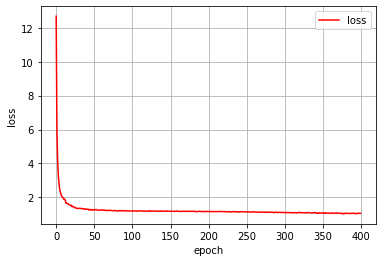

In [39]:

import numpy
import matplotlib.pylab as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))


plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

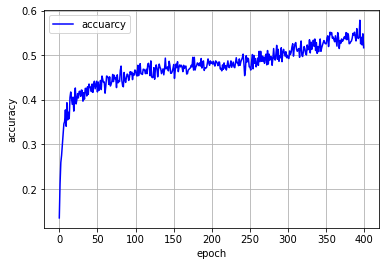

In [40]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.617006778717041


## <2-9. red wine 의 최적화>


In [0]:
w_train, z_train, w_test, z_test = generate_data(red_wine, 0.7)

In [35]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(w_train, z_train, validation_data = (w_test, z_test), epochs=400, batch_size = 128)

Train on 1119 samples, validate on 480 samples
Epoch 1/400
1119/1119 [==============================] - 0s 349us/step - loss: 12.6811 - accuracy: 0.1349 - val_loss: 2.4992 - val_accuracy: 0.2042
Epoch 2/400
1119/1119 [==============================] - 0s 90us/step - loss: 5.9404 - accuracy: 0.2118 - val_loss: 1.8905 - val_accuracy: 0.4729
Epoch 3/400
1119/1119 [==============================] - 0s 91us/step - loss: 4.0611 - accuracy: 0.2592 - val_loss: 1.9381 - val_accuracy: 0.4958
Epoch 4/400
1119/1119 [==============================] - 0s 88us/step - loss: 3.1907 - accuracy: 0.2752 - val_loss: 2.1189 - val_accuracy: 0.4875
Epoch 5/400
1119/1119 [==============================] - 0s 88us/step - loss: 2.6989 - accuracy: 0.2985 - val_loss: 2.0796 - val_accuracy: 0.3708
Epoch 6/400
1119/1119 [==============================] - 0s 103us/step - loss: 2.3871 - accuracy: 0.3199 - val_loss: 2.0015 - val_accuracy: 0.4021
Epoch 7/400
1119/1119 [==============================] - 0s 96us/step - lo

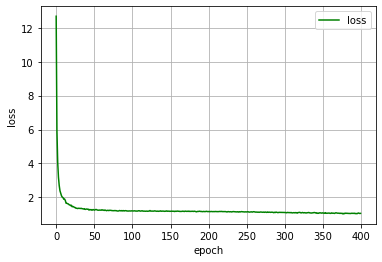

In [36]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

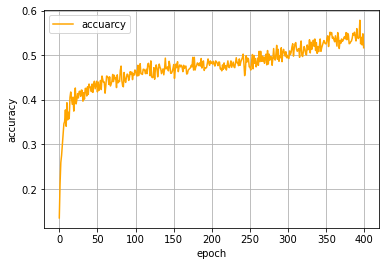

In [37]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [38]:
test_loss2, test_acc2 = model.evaluate(w_test, z_test, verbose=2)
print(test_acc2)

0.5770833492279053
